In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split

## KNN classifier

KNN 算法要求数据的所有特征都可以做可以比较的量化。若数据特征中存在非数值的类型，必须采取手段将其量化为数值

In [3]:
def load_classification_data():
    digits=datasets.load_digits() # 使用 scikit-learn 自带的手写识别数据集 Digit Dataset
    X_train=digits.data
    y_train=digits.target
    return train_test_split(X_train, y_train,test_size=0.25,
            random_state=0,stratify=y_train)

In [6]:
def test_KNeighborsClassifier_k_w(*data):
    '''
    测试 KNeighborsClassifier 中 n_neighbors 和 weights 参数的影响
    '''
    
    X_train,X_test,y_train,y_test=data
    Ks=np.linspace(1,y_train.size,num=10,endpoint=False,dtype='int')
    weights=['uniform','distance']

    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ### 绘制不同 weights 下， 预测得分随 n_neighbors 的曲线
    for weight in weights:
        training_scores=[]; testing_scores=[]
        for K in Ks:
            clf=neighbors.KNeighborsClassifier(weights=weight,n_neighbors=K)
            clf.fit(X_train,y_train)
            testing_scores.append(clf.score(X_test,y_test))
            training_scores.append(clf.score(X_train,y_train))
        ax.plot(Ks,testing_scores,label="testing score:weight=%s"%weight)
        ax.plot(Ks,training_scores,label="training score:weight=%s"%weight)
        
    ax.legend(loc='best')
    ax.set_xlabel("K")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.set_title("KNeighborsClassifier")
    plt.show()

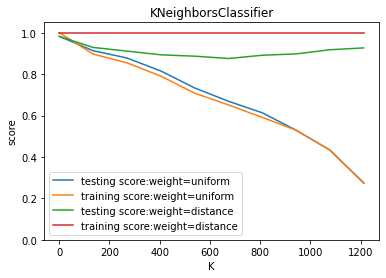

In [7]:
X_train,X_test,y_train,y_test=load_classification_data() # 获取分类模型的数据集
test_KNeighborsClassifier_k_w(X_train,X_test,y_train,y_test) # 调用 test_KNeighborsClassifier

uniform 投票策略的情况下，输入实例较远的训练实例也会对预测产生作用，使得预测发生错误

distance 投票策略的情况下（即投票策略与距离成反比），分类器随着距离的增长，预测性能比较稳定。这是因为虽然 k 增大，但是因为距离较远，其影响较小

## KNN regressor

In [8]:
def create_regression_data(n):
    X =5 * np.random.rand(n, 1)
    y = np.sin(X).ravel()
    y[::5] += 1 * (0.5 - np.random.rand(int(n/5))) # 每隔 5 个样本就在样本的值上添加噪音
    return cross_validation.train_test_split(X, y,test_size=0.25,random_state=0)

In [11]:
def test_KNeighborsRegressor_k_w(*data):
    '''
    测试 KNeighborsRegressor 中 n_neighbors 和 weights 参数的影响

    '''
    
    X_train,X_test,y_train,y_test=data
    Ks=np.linspace(1,y_train.size,num=10,endpoint=False,dtype='int')
    weights=['uniform','distance']

    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ### 绘制不同 weights 下， 预测得分随 n_neighbors 的曲线
    for weight in weights:
        training_scores=[]; testing_scores=[]
        for K in Ks:
            regr=neighbors.KNeighborsRegressor(weights=weight,n_neighbors=K)
            regr.fit(X_train,y_train)
            testing_scores.append(regr.score(X_test,y_test))
            training_scores.append(regr.score(X_train,y_train))
        ax.plot(Ks,testing_scores,label="testing score:weight=%s"%weight)
        ax.plot(Ks,training_scores,label="training score:weight=%s"%weight)
    ax.legend(loc='best')
    ax.set_xlabel("K")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.set_title("KNeighborsRegressor")
    plt.show()

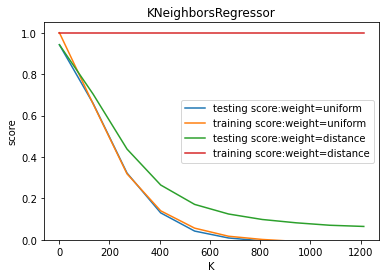

In [12]:
X_train,X_test,y_train,y_test=load_classification_data() # 获取分类模型的数据集
test_KNeighborsRegressor_k_w(X_train,X_test,y_train,y_test) 